In [2]:
from pyspark.sql import SparkSession

In [5]:
spark = (SparkSession.builder
         .appName("DataAnalytics")
         .getOrCreate()
)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


25/12/25 00:51:25 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [8]:
df = spark.read.option("header", True).csv('/Users/ahadmoeen/Library/CloudStorage/OneDrive-Personal/project_dec_2025/data/real-gdp-growth/real-gdp-growth.csv')

In [20]:
df = (
df
.withColumnRenamed('Gross domestic product, constant prices - Percent change - Observations', 'Gdp')
.withColumnRenamed('Gross domestic product, constant prices - Percent change - Forecasts', 'GDP-Forecasts')
)
        

In [21]:
df

DataFrame[Entity: string, Code: string, Year: string, Gdp: string, 1120034-annotations: string, GDP-Forecasts: string, 1120032-annotations: string]

In [22]:
df.createOrReplaceTempView("gdp_data")


In [25]:
spark.sql("""
    SELECT *
    FROM gdp_data
    limit 5;
    
""").show()


+-------------+----+----+-----+--------------------+-------------+-------------------+
|       Entity|Code|Year|  Gdp| 1120034-annotations|GDP-Forecasts|1120032-annotations|
+-------------+----+----+-----+--------------------+-------------+-------------------+
|ASEAN-5 (IMF)|null|1980|7.557|Indonesia, Malays...|         null|               null|
|ASEAN-5 (IMF)|null|1981|6.493|Indonesia, Malays...|         null|               null|
|ASEAN-5 (IMF)|null|1982| 3.85|Indonesia, Malays...|         null|               null|
|ASEAN-5 (IMF)|null|1983|4.488|Indonesia, Malays...|         null|               null|
|ASEAN-5 (IMF)|null|1984|4.552|Indonesia, Malays...|         null|               null|
+-------------+----+----+-----+--------------------+-------------+-------------------+



In [38]:
df_india_pak = spark.sql(""" 
    Select year,
    sum(case when Entity = 'Pakistan' then GDP else 0 end) as `pakistan gdp`, 
    sum(case when Entity = 'India' then GDP else 0 end) as `indian gdp`
    FROM gdp_data
    WHERE Entity IN ('India', 'Pakistan')
    group by year
    
""").toPandas()


In [45]:
df_india_pak = df_india_pak.sort_values('year')

df_india_pak = df_india_pak[df_india_pak['year'] > '2020']

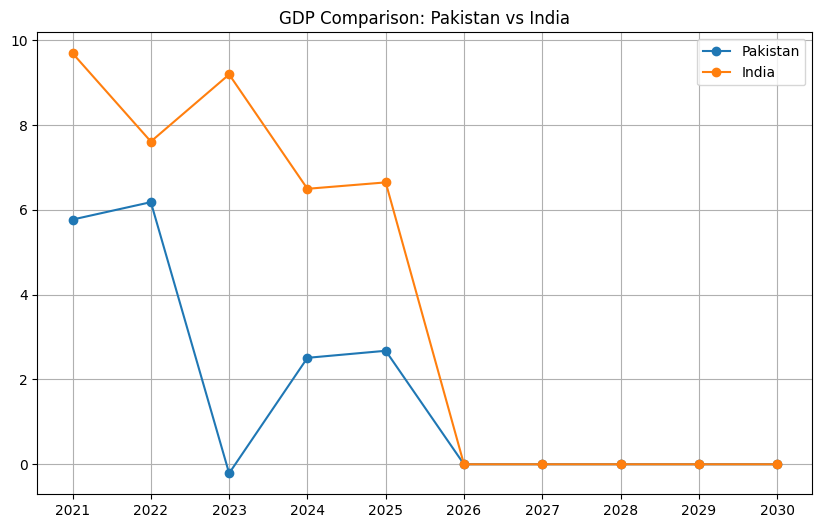

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(df_india_pak["year"], df_india_pak["pakistan gdp"], marker="o", label="Pakistan")
plt.plot(df_india_pak["year"], df_india_pak["indian gdp"], marker="o", label="India")

plt.title("GDP Comparison: Pakistan vs India")
plt.legend()
plt.grid(True)

plt.show()